In [1]:
# Libraries
import networkx as nx
import random
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

In [3]:
# Dataset
filename = 'amazon.txt'
amazon = nx.read_edgelist(filename)
total_nodes = amazon.number_of_nodes()


In [4]:
# Total Nodes
print(total_nodes)

148473


In [5]:
# Total Edges
edges= amazon.number_of_edges()
print(edges)

432788


In [7]:
# Total nodes to consider for centrality
list_count = total_nodes* 0.1
print(round(list_count))

14847


In [8]:
# Function to calculate degree, betweenness, and closeness centrality
def calculate_centralities(graph):
    # Degree centrality
    degree_centralities = nx.degree_centrality(graph)
    sorted_degree_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:15000]
    
    # Betweenness centrality
    betweenness_centralities = nx.betweenness_centrality(graph)
    sorted_betweenness_nodes = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:15000]
    
    # Closeness centrality
    closeness_centralities = nx.closeness_centrality(graph)
    sorted_closeness_nodes = sorted(closeness_centralities, key=closeness_centralities.get, reverse=True)[:15000]
    
    return sorted_degree_nodes, sorted_betweenness_nodes, sorted_closeness_nodes

# Common nodes as union of all three sets
def find_common_nodes(top_degree_nodes, top_betweenness_nodes, top_closeness_nodes):
    common_nodes = set(top_degree_nodes).union(set(top_betweenness_nodes), set(top_closeness_nodes))
    return list(common_nodes)


In [29]:

start_time = time.time()
top_degree_nodes, top_betweenness_nodes, top_closeness_nodes = calculate_centralities(amazon)

common_nodes = find_common_nodes(top_degree_nodes, top_betweenness_nodes, top_closeness_nodes)
end_time = time.time()


In [33]:
len(common_nodes)

334

In [34]:
time = end_time - start_time
print(time)

5.765070676803589


In [35]:
# Independent Cascade Model
# Information propagation
class IndependentCascadeModel:
    def __init__(self, graph):
        self.graph = graph

    def propagate(self, common_nodes, threshold=1):
        active_nodes = set(common_nodes)
        newly_activated_nodes = set(common_nodes)
        
        while newly_activated_nodes:
            next_newly_activated_nodes = set()
            
            for node in newly_activated_nodes:
                neighbors = list(self.graph.neighbors(node))
                
                for neighbor in neighbors:
                    if neighbor not in active_nodes:
                        indegree = self.graph.degree(neighbor)
                        propagation_prob = threshold / indegree if indegree > 0 else 0
                        
                        if random.random() < propagation_prob:
                            next_newly_activated_nodes.add(neighbor)
                            active_nodes.add(neighbor)
                            
            newly_activated_nodes = next_newly_activated_nodes
        return active_nodes


In [ ]:
# Cascade
independent_cascade_model = IndependentCascadeModel(amazon)
# Propagate
influenced_nodes = independent_cascade_model.propagate(common_nodes)

In [36]:
len(influenced_nodes)

719

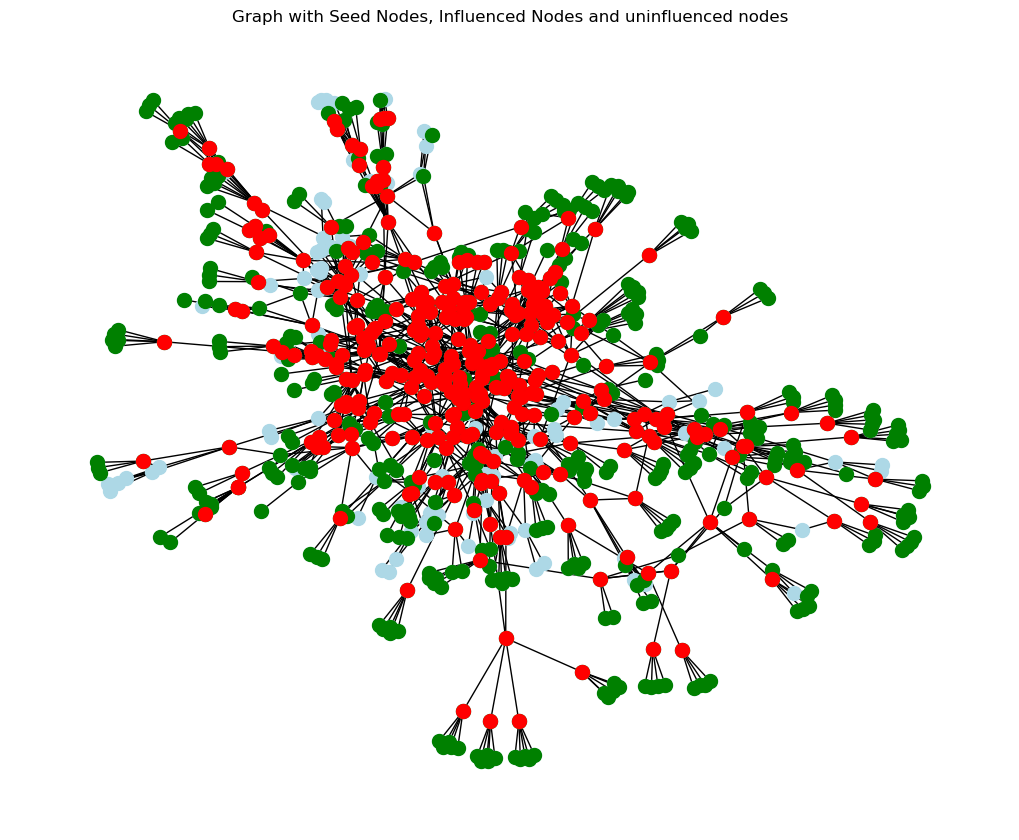

In [37]:
# Visualizing the graph
pos = nx.spring_layout(amazon)
plt.figure(figsize=(10, 8))

nx.draw(amazon, pos, with_labels=False, node_color='lightblue', node_size=100)
nx.draw_networkx_nodes(amazon, pos, nodelist=influenced_nodes, node_color='green', node_size=100)
nx.draw_networkx_nodes(amazon, pos, nodelist=common_nodes, node_color='red', node_size=100)

plt.title("Graph with Seed Nodes, Influenced Nodes and uninfluenced nodes")
plt.show()

In [38]:
# Memory Usage
mem_usage = memory_usage((independent_cascade_model.propagate, (common_nodes,), {'threshold': 1}))
max_mem_usage = max(mem_usage)

print("Max memory usage:", max_mem_usage, "MB")

Max memory usage: 140.1484375 MB


In [ ]:
# Comparison
# using the greedy approach

In [7]:
# Determining seed set usng greedy approach
def greedy_influence_maximization(network, k):
    seed_set = set()
    
    while len(seed_set) < k:
        best_node = None
        max_increase = -1
        
        for node in network.nodes:
            if node not in seed_set:
                # Adding the node to the seed set and calculate influence spread
                current_seed_set = seed_set.copy()
                current_seed_set.add(node)
                
                influence_spread = simulate_influence_spread(network, current_seed_set)
                increase = influence_spread - len(seed_set)
                
                if increase > max_increase:
                    max_increase = increase
                    best_node = node
                    
        seed_set.add(best_node)
    return seed_set

# Monte Carlo simulation for influence spread
def simulate_influence_spread(network, seed_set, iterations = 10):
    total_influenced = 0
    influenced_s = set()
    
    for _ in range(iterations):
        influenced_nodes = set(seed_set)
        for node in seed_set:
            influenced_nodes.update(nx.node_connected_component(network, node))
        total_influenced += len(influenced_nodes)
        
        influenced_s.update(influenced_nodes)
        avg_influenced = int(total_influenced / iterations)
        
    return avg_influenced


In [ ]:
start_time = time.time()
seed_set = greedy_influence_maximization(amazon, 80)

total  = simulate_influence_spread(amazon, seed_set, 10 )

end_time = time.time()

print("Time" , end_time - start_time)

In [ ]:
print(total)

In [ ]:
print(len(seed_set))